<a href="https://colab.research.google.com/github/vasvarym/FakeNewsProject/blob/main/liardatasetsentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
import string
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [2]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [3]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

#Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#test = pd.read_csv('test.csv')
#train = pd.read_csv('train.csv')
#valid = pd.read_csv('valid.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Datasets with sentiment and emotion analysis
train = pd.read_csv("/content/drive/My Drive/liartrainsent2.csv")
test = pd.read_csv("/content/drive/My Drive/liartestsent2.csv")
valid = pd.read_csv("/content/drive/My Drive/liarvalidsent2.csv")

In [ ]:
# Shape of each set

print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)
print("Shape of VALID DATA: ", valid.shape)

Shape of TRAIN DATA:  (10240, 9)
Shape of TEST DATA:  (2551, 9)
Shape of VALID DATA:  (2571, 9)


In [8]:
train

,Statement,Label,Polarity,Subjectivity,Happy,Angry,Surprise,Sad,Fear
0,Says the Annies List political group supports ...,False,0.000000,0.100000,0.0,0.00,1.00,0.00,0.00
1,When did the decline of coal start? It started...,True,0.100000,0.400000,0.0,0.00,1.00,0.00,0.00
2,"Hillary Clinton agrees with John McCain ""by vo...",True,0.000000,0.000000,0.0,0.00,0.00,0.00,1.00
3,Health care reform legislation is likely to ma...,False,0.200000,0.900000,0.5,0.00,0.00,0.00,0.50
4,The economic turnaround started at the end of ...,True,0.200000,0.200000,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,True,0.000000,0.500000,0.0,0.00,0.00,0.00,1.00
10236,Democrats have now become the party of the [At...,True,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
10237,Says an alternative to Social Security that op...,True,0.191667,0.258333,0.0,0.00,0.14,0.14,0.71
10238,On lifting the U.S. Cuban embargo and allowing...,False,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [7]:
print (train.loc[0,'Statement'])

Says the Annies List political group supports third-trimester abortions on demand.


# Sentiment Analysis (ignore if final dataset is loaded)

Get polarity and subjectivity scores of the news with TextBlob

In [ ]:
# Import the TextBlob
from textblob import TextBlob

In [ ]:
train

,Statement,Label,Polarity,Subjectivity,Emotions
0,Says the Annies List political group supports ...,False,0.000000,0.100000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ..."
1,When did the decline of coal start? It started...,True,0.100000,0.400000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ..."
2,"Hillary Clinton agrees with John McCain ""by vo...",True,0.000000,0.000000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
3,Health care reform legislation is likely to ma...,False,0.200000,0.900000,"{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,The economic turnaround started at the end of ...,True,0.200000,0.200000,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,True,0.000000,0.500000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
10236,Democrats have now become the party of the [At...,True,0.000000,0.000000,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
10237,Says an alternative to Social Security that op...,True,0.191667,0.258333,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.14,..."
10238,On lifting the U.S. Cuban embargo and allowing...,False,0.000000,0.000000,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."


In [ ]:
# Add polarities and subjectivities into the DataFrame by using TextBlob
train["Polarity"] = train["Statement"].apply(lambda word: TextBlob(word).sentiment.polarity)
train["Subjectivity"] = train["Statement"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

test["Polarity"] = test["Statement"].apply(lambda word: TextBlob(word).sentiment.polarity)
test["Subjectivity"] = test["Statement"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

valid["Polarity"] = valid["Statement"].apply(lambda word: TextBlob(word).sentiment.polarity)
valid["Subjectivity"] = valid["Statement"].apply(lambda word: TextBlob(word).sentiment.subjectivity)


# Display the Polarity and Subjectivity columns of train dataset
display(train[["Statement","Polarity","Subjectivity"]].head(10))

,Statement,Polarity,Subjectivity
0,Says the Annies List political group supports ...,0.000000,0.100000
1,When did the decline of coal start? It started...,0.100000,0.400000
2,"Hillary Clinton agrees with John McCain ""by vo...",0.000000,0.000000
3,Health care reform legislation is likely to ma...,0.200000,0.900000
4,The economic turnaround started at the end of ...,0.200000,0.200000
5,The Chicago Bears have had more starting quart...,0.100000,0.296667
6,Jim Dunnam has not lived in the district he re...,0.000000,0.000000
7,I'm the only person on this stage who has work...,-0.044444,0.555556
8,"However, it took $19.5 million in Oregon Lotte...",0.136364,0.454545
9,Says GOP primary opponents Glenn Grothman and ...,0.325000,0.500000


In [ ]:
# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
train["SentLabel"] = train["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(train[["SentLabel"]].head(10))

,SentLabel
0,Neutral
1,Positive
2,Neutral
3,Positive
4,Positive
5,Positive
6,Neutral
7,Negative
8,Positive
9,Positive


In [ ]:
# Print the value counts of the SentLabel column
print(train["SentLabel"].value_counts())

Neutral     4635
Positive    3677
Negative    1928
Name: SentLabel, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


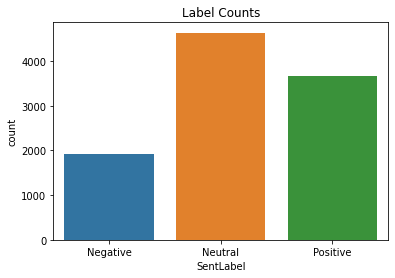

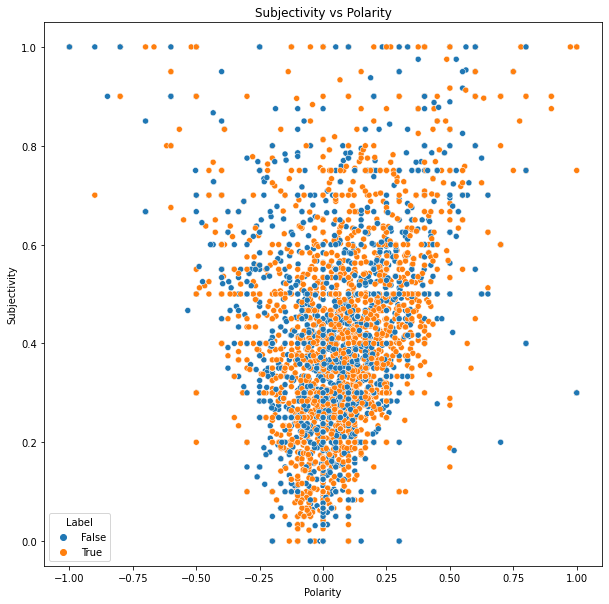

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Change the datatype as "category"
train["SentLabel"] = train["SentLabel"].astype("category")

# Visualize the Label counts
sns.countplot(train["SentLabel"])
plt.title("Label Counts")
plt.show()

# Visualize the Polarity scores
plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=train)
plt.title("Subjectivity vs Polarity")
plt.show()

# Emotion Analysis (ignore if final dataset is leaded)

In [ ]:
#Install package using pip
!pip install text2emotion

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 133kB 13.0MB/s 


In [ ]:
#Import the modules
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Extracting emotions for each article in the dataset
train['Emotions'] = train["Statement"].apply(te.get_emotion)
test['Emotions'] = test["Statement"].apply(te.get_emotion)
valid['Emotions'] = valid["Statement"].apply(te.get_emotion)


In [ ]:
train['Emotions'][0]

"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}"

In [ ]:
#extracting emotions froma  dictionary into new rows
trainemo = pd.DataFrame(train['Emotions'].tolist())
testemo = pd.DataFrame(test['Emotions'].tolist())
validemo = pd.DataFrame(valid['Emotions'].tolist())

In [ ]:
validemo

,Happy,Angry,Surprise,Sad,Fear
0,0.0,0.00,0.0,0.00,1.00
1,0.0,0.50,0.0,0.00,0.50
2,0.0,0.00,0.4,0.20,0.40
3,0.0,0.00,1.0,0.00,0.00
4,0.0,0.33,0.0,0.33,0.33
...,...,...,...,...,...
2566,0.0,0.00,1.0,0.00,0.00
2567,0.0,0.00,0.0,0.00,1.00
2568,0.0,0.00,0.0,0.33,0.67
2569,0.0,0.00,0.4,0.00,0.60


In [ ]:
#extracting emotions froma  dictionary into new rows
train = pd.concat([train, trainemo], axis=1)
test = pd.concat([test, testemo], axis=1)
valid = pd.concat([valid, validemo], axis=1)

In [ ]:
valid

,Statement,Label,Polarity,Subjectivity,Happy,Angry,Surprise,Sad,Fear
0,We have less Americans working now than in the...,FALSE,-0.166667,0.066667,0.0,0.00,0.0,0.00,1.00
1,"When Obama was sworn into office, he DID NOT u...",FALSE,0.000000,0.780000,0.0,0.50,0.0,0.00,0.50
2,Says Having organizations parading as being so...,FALSE,0.011111,0.055556,0.0,0.00,0.4,0.20,0.40
3,Says nearly half of Oregons children are poor.,TRUE,-0.283333,0.383333,0.0,0.00,1.0,0.00,0.00
4,On attacks by Republicans that various program...,TRUE,0.008333,0.191667,0.0,0.33,0.0,0.33,0.33
...,...,...,...,...,...,...,...,...,...
2566,Says Donald Trump has bankrupted his companies...,TRUE,0.000000,0.000000,0.0,0.00,1.0,0.00,0.00
2567,"John McCain and George Bush have ""absolutely n...",TRUE,-0.050000,0.450000,0.0,0.00,0.0,0.00,1.00
2568,A new poll shows 62 percent support the presid...,FALSE,0.045455,0.298737,0.0,0.00,0.0,0.33,0.67
2569,No one claims the report vindicating New Jerse...,FALSE,0.136364,0.454545,0.0,0.00,0.4,0.00,0.60


In [ ]:
#saving it onto google drive as a csv file
train.to_csv("/content/drive/My Drive/liartrainsent2.csv", index=False)
test.to_csv("/content/drive/My Drive/liartestsent2.csv", index=False)
valid.to_csv("/content/drive/My Drive/liarvalidsent2.csv", index=False)

#Pre-processing

In [9]:
# transform labels

def transformLabel(newLabels):
  labels = newLabels.copy()
  for i in range(len(labels)):
    if labels[i] == 'false':
      labels[i] = 0.0
    elif labels[i] == 'true':
      labels[i] = 1.0
  labels = np.asarray(labels).astype('float32')
  return labels

In [10]:
#Removing noise from the text, such as special characters, numbers and hyperlinksperlinks
def rem_noise(text):
  text = text.translate(str.maketrans('','',string.punctuation))

  text =  re.sub('[0-9]+','',text)

  text = re.sub('https?:\S+','',text)

  text =  re.sub('<.*?>'," ",text)

  return text

In [11]:
#Removing stopwords(commonly used words such as "are" and "us" from text)
stop = set(stopwords.words('english'))

def rem_stopwords(text):
    
    words = [ch for ch in text if ch not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in text.split()]
    
    return words

In [12]:
#Assigning each word a number
def tokenize_statements(text):
    
    # Tokenize the words
    tokenized = word_tokenize(text)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words, changing text to lowercase
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token.lower(), pos='a') for token in tokenized]
    
    return tokenized

In [13]:
#Removing noise from the articles
train["Statement"] = train["Statement"].apply(rem_noise)

test["Statement"] = test["Statement"].apply(rem_noise)

valid["Statement"] = valid["Statement"].apply(rem_noise)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


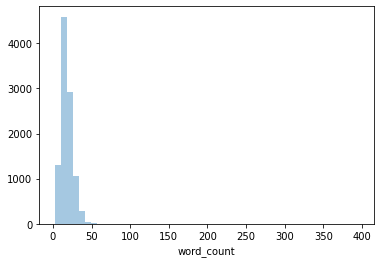

In [ ]:
train['word_count'] = [len(s.split()) for s in train['Statement']]
#real 
sb.distplot(train['word_count'], kde=False, rug=False)

In [ ]:
train

,Statement,Label,Polarity,Subjectivity,Happy,Angry,Surprise,Sad,Fear
0,Says the Annies List political group supports ...,False,0.000000,0.100000,0.0,0.00,1.00,0.00,0.00
1,When did the decline of coal start It started ...,True,0.100000,0.400000,0.0,0.00,1.00,0.00,0.00
2,Hillary Clinton agrees with John McCain by vot...,True,0.000000,0.000000,0.0,0.00,0.00,0.00,1.00
3,Health care reform legislation is likely to ma...,False,0.200000,0.900000,0.5,0.00,0.00,0.00,0.50
4,The economic turnaround started at the end of ...,True,0.200000,0.200000,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,True,0.000000,0.500000,0.0,0.00,0.00,0.00,1.00
10236,Democrats have now become the party of the Atl...,True,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
10237,Says an alternative to Social Security that op...,True,0.191667,0.258333,0.0,0.00,0.14,0.14,0.71
10238,On lifting the US Cuban embargo and allowing t...,False,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


# TF-IDF

In [118]:
X_train = train["Statement"]
X_test = test["Statement"]
y_train = train["Label"]
y_test = test["Label"]

x_train_sentiment_emo = train[["Polarity", "Subjectivity","Happy", "Angry", "Surprise", "Sad", "Fear"]].copy()

In [119]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10240,)
(10240,)
(2551,)
(2551,)


In [120]:
# Vectorize the text so the models can interpret it. max_features = 2000, so the vectors are not too large
vectorizer = TfidfVectorizer(tokenize_statements, max_features = 2000)
x_train_vectorized = vectorizer.fit_transform(X_train)
x_test_vectorized = vectorizer.transform(X_test)

In [121]:
print (x_train_vectorized.shape)
print (x_test_vectorized.shape)
print (y_train.shape)
print (y_test.shape)



(10240, 2000)
(2551, 2000)
(10240,)
(2551,)


In [122]:
df_x_train_tfidf =  pd.DataFrame.sparse.from_spmatrix(x_train_vectorized)
df_x_train_tfidf['polarity'] = train['Polarity'].values
df_x_train_tfidf['subjectivity'] = train['Subjectivity'].values
df_x_train_tfidf['happy'] = train['Happy'].values
df_x_train_tfidf['angry'] = train['Angry'].values
df_x_train_tfidf['surprise'] = train['Surprise'].values
df_x_train_tfidf['sad'] = train['Sad'].values
df_x_train_tfidf['fear'] = train['Fear'].values

df_x_test_tfidf =  pd.DataFrame.sparse.from_spmatrix(x_test_vectorized)
df_x_test_tfidf['polarity'] = test['Polarity'].values
df_x_test_tfidf['subjectivitiy'] = test['Subjectivity'].values
df_x_test_tfidf['happy'] = test['Happy'].values
df_x_test_tfidf['angry'] = test['Angry'].values
df_x_test_tfidf['surprise'] = test['Surprise'].values
df_x_test_tfidf['sad'] = test['Sad'].values
df_x_test_tfidf['fear'] = test['Fear'].values

df_x_train_tfidf_nopol = x_train_vectorized
df_x_test_tfidf_nopol = x_test_vectorized

# Logistic Regression

In [ ]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(df_x_train_tfidf, y_train)
logR_predicted = log_reg.predict(df_x_test_tfidf)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(df_x_test_tfidf, y_test)}")

In [26]:
log_reg_nopol = LogisticRegression(solver='lbfgs')
log_reg_nopol.fit(df_x_train_tfidf_nopol, y_train)
logR_predicted = log_reg_nopol.predict(df_x_test_tfidf_nopol)
print(f"{log_reg_nopol.__class__.__name__} accuracy: {log_reg_nopol.score(df_x_test_tfidf_nopol, y_test)}")

LogisticRegression accuracy: 0.6087808702469619


In [25]:
print(classification_report(y_test, logR_predicted))
print('\n')
print(confusion_matrix(y_test, logR_predicted))

              precision    recall  f1-score   support

       False       0.60      0.48      0.53      1169
        True       0.62      0.73      0.67      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.60      0.60      2551
weighted avg       0.61      0.62      0.61      2551



[[ 559  610]
 [ 372 1010]]


In [ ]:
cv_results = cross_validate(log_reg, df_x_train_tfidf, y_train, cv=2)
cv_results['test_score'].mean()

0.607421875

#Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(df_x_train_tfidf, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(df_x_test_tfidf, y_test)}")

RandomForestClassifier accuracy: 0.5793806350450803


In [ ]:
random_forest_nopol = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest_nopol.fit(df_x_train_tfidf_nopol, y_train)

print(f"{random_forest_nopol.__class__.__name__} accuracy: {random_forest_nopol.score(df_x_test_tfidf_nopol, y_test)}")

In [ ]:
rForest_pred = random_forest.predict(df_x_test_tfidf)
print(classification_report(y_test, rForest_pred))
print('\n')
print(confusion_matrix(y_test, rForest_pred))

In [ ]:
cv_results = cross_validate(random_forest, df_x_train_tfidf, y_train, cv=5)
cv_results['test_score'].mean()

#SVM

In [41]:
svm = LinearSVC()
svm.fit(df_x_train_tfidf, y_train)
print(f"{svm.__class__.__name__} accuracy: {svm.score(df_x_test_tfidf, y_test)}")

LinearSVC accuracy: 0.6005488043904351


In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(df_x_train_tfidf, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(df_x_test_tfidf)
  
# print classification report
print(classification_report(y_test, grid_predictions))

In [42]:
svm_nopol = LinearSVC()
svm_nopol.fit(df_x_train_tfidf_nopol, y_train)
print(f"{svm_nopol.__class__.__name__} accuracy: {svm_nopol.score(df_x_test_tfidf_nopol, y_test)}")

LinearSVC accuracy: 0.6013328106624853


In [44]:
svm_pred = svm.predict(df_x_test_tfidf)

print(classification_report(y_test, svm_pred))
print('\n')
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

       False       0.57      0.52      0.54      1169
        True       0.62      0.67      0.64      1382

    accuracy                           0.60      2551
   macro avg       0.60      0.59      0.59      2551
weighted avg       0.60      0.60      0.60      2551



[[610 559]
 [460 922]]


In [ ]:
cv_results = cross_validate(svm, df_x_train_tfidf, y_train, cv=5)
cv_results['test_score'].mean()

# MLP

In [143]:
clf = MLPClassifier(hidden_layer_sizes=(64,64,64), random_state=1, max_iter=800).fit(df_x_train_tfidf, y_train)

In [144]:
clf.score(df_x_test_tfidf, y_test)

0.5883967071736574

In [145]:
mlp_pred = clf.predict(df_x_test_tfidf)

In [146]:
print(classification_report(y_test, mlp_pred, zero_division = 1))
print(confusion_matrix(y_test, mlp_pred))

              precision    recall  f1-score   support

       False       0.56      0.46      0.51      1169
        True       0.60      0.69      0.65      1382

    accuracy                           0.59      2551
   macro avg       0.58      0.58      0.58      2551
weighted avg       0.58      0.59      0.58      2551

[[541 628]
 [422 960]]


#GoVe LSTM

In [50]:
df_lstm_all = pd.concat([train,test])

In [51]:
df_lstm_all

,Statement,Label,Polarity,Subjectivity,Happy,Angry,Surprise,Sad,Fear
0,Says the Annies List political group supports ...,False,0.000000,0.100000,0.0,0.0,1.0,0.00,0.00
1,When did the decline of coal start It started ...,True,0.100000,0.400000,0.0,0.0,1.0,0.00,0.00
2,Hillary Clinton agrees with John McCain by vot...,True,0.000000,0.000000,0.0,0.0,0.0,0.00,1.00
3,Health care reform legislation is likely to ma...,False,0.200000,0.900000,0.5,0.0,0.0,0.00,0.50
4,The economic turnaround started at the end of ...,True,0.200000,0.200000,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2546,For the first time in more than a decade impor...,True,0.104167,0.266667,0.0,0.0,0.5,0.00,0.50
2547,Says Donald Trump has bankrupted his companies...,True,0.000000,0.000000,0.0,0.0,1.0,0.00,0.00
2548,John McCain and George Bush have absolutely no...,True,-0.050000,0.450000,0.0,0.0,0.0,0.00,1.00
2549,A new poll shows percent support the presiden...,False,0.045455,0.298737,0.0,0.0,0.0,0.33,0.67


In [52]:
glovedf = df_lstm_all.reset_index(drop=True)

In [53]:
cleantext = glovedf['Statement'].apply(rem_noise)
cleantext = cleantext.apply(rem_stopwords)
y_transformed = transformLabel(glovedf['Label'])

In [54]:
y_transformed

array([0., 1., 1., ..., 1., 0., 0.], dtype=float32)

In [55]:
x = cleantext.values
y = y_transformed

In [56]:
from keras.preprocessing import text, sequence

In [57]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
contentSequence = tokenizer.texts_to_sequences(x)

In [58]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
max_length = 500
embedding_dim = 100

In [59]:
from keras.preprocessing.sequence import pad_sequences

contentSequence = pad_sequences(contentSequence, maxlen=max_length)

In [60]:
contentSequence

array([[   0,    0,    0, ...,  532,   11, 1668],
       [   0,    0,    0, ...,  621, 1051,  168],
       [   0,    0,    0, ..., 3820,   11,  369],
       ...,
       [   0,    0,    0, ..., 1399,   30,   40],
       [   0,    0,    0, ...,   30,  115,   90],
       [   0,    0,    0, ..., 2164,   10, 7440]], dtype=int32)

#Glove Embedding

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# load the whole embedding into memory

embeddings_index = {};
with open('/content/drive/My Drive/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

# create a weight matrix for words

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [63]:
df_lstm =  pd.DataFrame(contentSequence)
df_lstm['polarity'] = glovedf['Polarity'].values
df_lstm['happy'] = glovedf['Happy'].values
df_lstm['angry'] = glovedf['Angry'].values
df_lstm['surprise'] = glovedf['Surprise'].values
df_lstm['sad'] = glovedf['Sad'].values
df_lstm['fear'] = glovedf['Fear'].values

In [64]:
df_lstm.shape

(12791, 501)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_lstm,y,test_size=0.20,random_state=1)

In [ ]:
X_train

In [67]:
polarity_xtrain = X_train.polarity.values
X_train = X_train.drop([['polarity','happy','angry','surprise','sad','fear' ]], axis=1)

In [68]:
polarity_xtest = X_test.polarity.values
X_test = X_test.drop([['polarity','happy','angry','surprise','sad','fear' ]], axis=1)

In [69]:
xtrain_glove = np.array(X_train)
xtest_glove = np.array(X_test)

#Defining Neural Network

#LSTM

In [70]:
#model = Sequential()
#Non-trainable embeddidng layer
#model.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
#LSTM 
#model.add(LSTM(units=64, dropout=0.2))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [71]:
#Defining Neural Network
model_glove = Sequential()
#Non-trainable embeddidng layer
model_glove.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
model_glove.add(Bidirectional(LSTM(units=64)))
model_glove.add(Dropout(0.5))
model_glove.add(Dense(units=32, name = 'last', activation='sigmoid'))
model_glove.add(Dropout(0.2))
model_glove.add(Dense(units=1, activation='sigmoid'))
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model_glove.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1382400   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
last (Dense)                 (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,471,041
Trainable params: 88,641
Non-trainable params: 1,382,400
_________________________________________

In [73]:
history = model_glove.fit(X_train, y_train, validation_data = (X_test,y_test) , epochs=10)

Epoch 1/10
320/320 [==============================] - 78s 233ms/step - loss: 0.6990 - accuracy: 0.5359 - val_loss: 0.6700 - val_accuracy: 0.5815
Epoch 2/10
320/320 [==============================] - 74s 232ms/step - loss: 0.6643 - accuracy: 0.5965 - val_loss: 0.6801 - val_accuracy: 0.5713
Epoch 3/10
320/320 [==============================] - 76s 237ms/step - loss: 0.6615 - accuracy: 0.6000 - val_loss: 0.6612 - val_accuracy: 0.6131
Epoch 4/10
320/320 [==============================] - 76s 237ms/step - loss: 0.6486 - accuracy: 0.6246 - val_loss: 0.6641 - val_accuracy: 0.5932
Epoch 5/10
320/320 [==============================] - 76s 237ms/step - loss: 0.6461 - accuracy: 0.6324 - val_loss: 0.6589 - val_accuracy: 0.6135
Epoch 6/10
320/320 [==============================] - 76s 238ms/step - loss: 0.6400 - accuracy: 0.6321 - val_loss: 0.6563 - val_accuracy: 0.6213
Epoch 7/10
320/320 [==============================] - 80s 250ms/step - loss: 0.6308 - accuracy: 0.6415 - val_loss: 0.6578 - val_ac

In [74]:
y_pred_glove = (model_glove.predict(X_test) > 0.5).astype("int")

In [75]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))

              precision    recall  f1-score   support

         0.0       0.55      0.58      0.57      1155
         1.0       0.64      0.62      0.63      1404

    accuracy                           0.60      2559
   macro avg       0.60      0.60      0.60      2559
weighted avg       0.60      0.60      0.60      2559



In [76]:
temp_model =  Model(model_glove.inputs, model_glove.get_layer('last').output)

In [77]:
historytrain = temp_model.predict(X_train)

In [78]:
historytest = temp_model.predict(X_test)

In [79]:
temp_xtrain = pd.DataFrame(historytrain)

In [80]:
temp_xtest = pd.DataFrame(historytest)

In [81]:
temp_xtrain['polarity'] = polarity_xtrain

In [82]:
temp_xtest['polarity'] = polarity_xtest

In [83]:
model_glove2 = Sequential()
model_glove2.add(Input(shape = (33)))
#LSTM
model_glove2.add(Dense(units = 32 , activation = 'relu'))
model_glove2.add(Dense(1, activation='sigmoid'))
model_glove2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
model_glove2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [85]:
model2train = model_glove2.fit(temp_xtrain, y_train, validation_data = (temp_xtest,y_test) , epochs=20)

Epoch 1/20
320/320 [==============================] - 1s 2ms/step - loss: 0.5984 - accuracy: 0.6948 - val_loss: 0.7045 - val_accuracy: 0.6092
Epoch 2/20
320/320 [==============================] - 1s 2ms/step - loss: 0.5612 - accuracy: 0.7127 - val_loss: 0.6990 - val_accuracy: 0.6100
Epoch 3/20
320/320 [==============================] - 1s 2ms/step - loss: 0.5651 - accuracy: 0.7132 - val_loss: 0.7056 - val_accuracy: 0.6116
Epoch 4/20
320/320 [==============================] - 1s 2ms/step - loss: 0.5612 - accuracy: 0.7192 - val_loss: 0.7086 - val_accuracy: 0.6049
Epoch 5/20
320/320 [==============================] - 1s 2ms/step - loss: 0.5676 - accuracy: 0.7081 - val_loss: 0.7145 - val_accuracy: 0.6081
Epoch 6/20
320/320 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7229 - val_loss: 0.7035 - val_accuracy: 0.6081
Epoch 7/20
320/320 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7077 - val_loss: 0.7120 - val_accuracy: 0.6069
Epoch 

In [86]:
y_pred_glove = (model_glove2.predict(temp_xtest) > 0.5).astype("int")

In [89]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))
print(confusion_matrix(y_test, y_pred_glove))

              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56      1155
         1.0       0.64      0.65      0.65      1404

    accuracy                           0.61      2559
   macro avg       0.60      0.60      0.60      2559
weighted avg       0.61      0.61      0.61      2559

[[638 517]
 [487 917]]


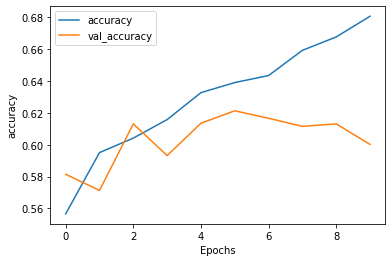

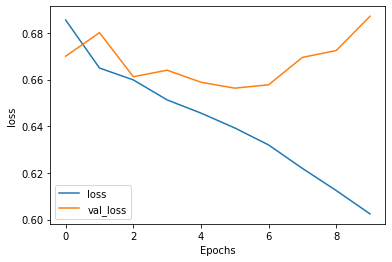

In [91]:
#plot accuracy and loss
def plot_graphs(history2, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [93]:
from tensorflow.keras.layers import Bidirectional
# Creating bidirectional lstm model
model_bilstm=Sequential()
model_bilstm.add(Embedding(vocab_size+1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False))
model_bilstm.add(Bidirectional(LSTM(units=64))) # Bidirectional LSTM layer
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(32,activation='relu'))
model_bilstm.add(Dense(1,activation='sigmoid'))
model_bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [94]:
# Fitting the model
history_bilstm = model_bilstm.fit(xtrain_glove, y_train, validation_data = (xtest_glove,y_test) , epochs=10)

Epoch 1/10
320/320 [==============================] - 82s 246ms/step - loss: 0.6839 - accuracy: 0.5576 - val_loss: 0.6742 - val_accuracy: 0.5807
Epoch 2/10
320/320 [==============================] - 78s 245ms/step - loss: 0.6626 - accuracy: 0.6077 - val_loss: 0.6659 - val_accuracy: 0.5932
Epoch 3/10
320/320 [==============================] - 80s 251ms/step - loss: 0.6495 - accuracy: 0.6140 - val_loss: 0.6597 - val_accuracy: 0.6081
Epoch 4/10
320/320 [==============================] - 80s 251ms/step - loss: 0.6482 - accuracy: 0.6197 - val_loss: 0.6615 - val_accuracy: 0.6104
Epoch 5/10
320/320 [==============================] - 77s 241ms/step - loss: 0.6424 - accuracy: 0.6301 - val_loss: 0.6570 - val_accuracy: 0.6112
Epoch 6/10
320/320 [==============================] - 78s 244ms/step - loss: 0.6388 - accuracy: 0.6436 - val_loss: 0.6571 - val_accuracy: 0.6155
Epoch 7/10
320/320 [==============================] - 79s 246ms/step - loss: 0.6308 - accuracy: 0.6422 - val_loss: 0.6589 - val_ac

In [96]:
from sklearn.metrics import plot_confusion_matrix
# Predicting from test dataset
y_pred_bilstm=(model_bilstm.predict(X_test)> 0.5).astype("int")

print(classification_report(y_test, y_pred_bilstm, zero_division = 1))
print(confusion_matrix(y_test, y_pred_glove))

              precision    recall  f1-score   support

         0.0       0.58      0.49      0.53      1155
         1.0       0.63      0.72      0.67      1404

    accuracy                           0.61      2559
   macro avg       0.61      0.60      0.60      2559
weighted avg       0.61      0.61      0.61      2559

[[638 517]
 [487 917]]


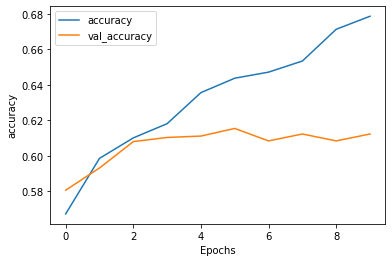

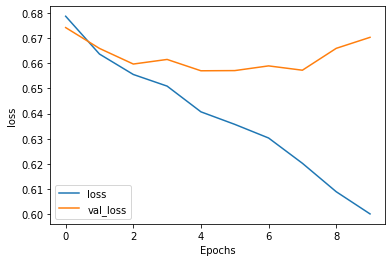

In [97]:
#plot accuracy and loss
def plot_graphs(history2, string):
  plt.plot(history_bilstm.history[string])
  plt.plot(history_bilstm.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_bilstm, "accuracy")
plot_graphs(history_bilstm, "loss")